In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pydataset import data

In [ ]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

### 1.In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.


In [ ]:
# print the first 3 rows
df_iris = data("iris")
df_iris.head(3)
# Another way to load the data set iris = sns.load_dataset('iris')

In [ ]:
# print the number of rows and columns (use attribute shape) 
df_iris.shape

In [ ]:
# print the column names
list(df_iris.columns.values)

In [ ]:
# print the column names
df_iris.columns.tolist()

In [ ]:
# print the data type of each column
df_iris.info()

In [ ]:
# print the summary statistics for each of the numeric variables. Would you recommend rescaling the data 
# based on these statistics? I would not rescale. The mean and std are not too far off
df_iris.describe() #.describe() method

### 2.Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

assign the first 100 rows to a new dataframe, df_excel_sample
print the number of rows of your original dataframe
print the first 5 column names
print the column names that have a data type of object
compute the range for each of the numeric variables.

In [ ]:
#df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')
df_excel = pd.read_csv("Spreadsheets_Exercises.csv")
df_excel.head()

In [ ]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)
df_excel_sample

In [ ]:
#print the number of rows of your original dataframe
df_excel.shape
# df_excel.index too

In [ ]:
# print the first 5 column names
df_excel.columns[:5]

In [ ]:
# print the column names that have a data type of object
df_excel.select_dtypes(include='object')

In [ ]:
# Using a list comprehension to get column names of oject type
[col for col in df_excel if df_excel[col].dtype == 'object']

In [ ]:
# Using a for loop to get column names of oject type
for col in df_excel:
    if df_excel[col].dtype == "object":
        print(col)
        

In [ ]:
# compute the range for each of the numeric variables
# select dtypes of numbers with a np array. Then get the range
numeric_vars = df_excel.select_dtypes(np.number)
numeric_range = numeric_vars.max() - numeric_vars.min()
numeric_range

### 3.Read the data from this google sheet into a dataframe, df_google

In [ ]:
# print the first 3 rows

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head(3)


In [ ]:
# print the number of rows and columns
df_googlesheet.shape

In [ ]:
# print the column names. .columns attribute
df_googlesheet.columns

In [ ]:
# prints the columns to a list
df_googlesheet.columns.tolist()

In [ ]:
# print the data type of each column
df_googlesheet.info()

In [ ]:
# print the summary statistics for each of the numeric variables .T transposes
df_googlesheet.describe().T

In [ ]:
df_googlesheet.value_counts()

In [ ]:
# print the unique values for each of your categorical variables. the .dtypes attribute
for col in df_googlesheet:
    if df_googlesheet[col].dtypes == 'object':
        print(f'{col} has {df_googlesheet[col].nunique()} unique values.')

### Make a new python module, acquire.py to hold the following data aquisition functions:

### Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [ ]:
# Import credentials from env. Also import os
from env import host, user, password
import os

In [ ]:
# establish mysql connection
def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [ ]:
# create a variable for sql query
def new_titanic_data():
    sql_query = 'SELECT * FROM passengers'
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    df.to_csv('titanic_df.csv')
    return df

In [ ]:
def get_titanic_data(cached=False):
    '''
    This function reads in titanic data from Codeup database if cached == False
    or if cached == True reads in titanic df from a csv file, returns df
    '''
    if cached or os.path.isfile('titanic_df.csv') == False:
        df = new_titanic_data()
    else:
        df = pd.read_csv('titanic_df.csv', index_col=0)
    return df


In [ ]:
titanic_df = get_titanic_data(cached=False)

In [ ]:
titanic_df.head()

Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas DataFrame. The returned DataFrame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [ ]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df,
    writes it to a csv file, and returns the df.
    '''
    sql_query = """
                SELECT species_id,
                measurement_id
                species_name,
                sepal_length,
                sepal_width,
                petal_length,
                petal_width
                FROM measurements
                JOIN species
                USING(species_id)
                """
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    df.to_csv('iris_df.csv')
    return df

In [ ]:
def get_iris_data(cached=False):
    '''
    This function reads in iris data from Codeup database if cached == False
    or if cached == True reads in iris df from a csv file, returns df
    '''
    if cached or os.path.isfile('iris_df.csv') == False:
        df = new_iris_data()
    else:
        df = pd.read_csv('iris_df.csv', index_col=0)
    return df

In [ ]:
iris_df = get_iris_data(cached=False)

In [ ]:
iris_df.head()

# Data Preperation Exercise
### The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

### Iris Data

 - Use the function defined in acquire.py to load the iris data.
 - Drop the species_id and measurement_id columns.
 - Rename the species_name column to just species.
 - Create dummy variables of the species name.
 - Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
#Importing acquire file created
import acquire
from acquire import get_iris_data

In [ ]:
# A. Use the function defined in acquire.py to load the iris data. 
# Creating irisdf using the cached file created
df = get_iris_data()
df.head()

In [ ]:
# B. Drop the species_id and measurement_id columns.
cols_to_drop = ['species_id','measurement_id']
df = df.drop(columns=cols_to_drop)

In [ ]:
df

In [ ]:
# C. Rename the species_name column to just species.
df = df.rename({'species_name':'species'}, axis = 1)
df

In [ ]:
# D. Create dummy variables of the species name.
dummy_df = pd.get_dummies(df[['species']], dummy_na=False)
dummy_df

In [ ]:
# Now going to concat the irisdf and dummy_df
df = pd.concat([df, dummy_df], axis = 1)
df

# Create a function named prep_iris that accepts the untransformed iris data, and returns
# the data with the transformations above applied.
#def prep_iris(irisdf):
    '''
    This function acquires and prepares the iris data from a local csv, default.
    Passing cached=False acquires fresh data from Codeup db and writes to csv.
    Returns the iris df with dummy variables encoding species.
    '''
    # use my aquire function to read data into a df from a csv file
    irisdf = get_iris_data(cached)
    cols_to_drop = ['species_id','measurement_id']
    irisdf = irisdf.drop(columns=cols_to_drop)
    irisdf = irisdf.rename({'species_name':'species'}, axis = 1)
    dummy_df = pd.get_dummies(irisdf[['species']], dummy_na=False)
    irisdf = pd.concat([irisdf, dummy_df], axis = 1)
    return irisdf
    

In [ ]:
def prep_iris(cached = True):
    '''
    This function acquires and prepares the iris data from a local csv, default.
    Passing cached=False acquires fresh data from Codeup db and writes to csv.
    Returns the iris df with dummy variables encoding species.
    '''
    # use my aquire function to read data into a df from a csv file
    df = get_iris_data(cached)
    cols_to_drop = ['species_id','measurement_id']
    df = df.drop(columns=cols_to_drop)
    df = df.rename({'species_name':'species'}, axis = 1)
    dummy_df = pd.get_dummies(df[['species']], dummy_na=False)
    df = pd.concat([df, dummy_df], axis = 1)
    return df

# Titanic Data

## Use the function you defined in acquire.py to load the titanic data set.
- A. Handle the missing values in the embark_town and embarked columns.
- B. Remove the deck column.
- C. Create a dummy variable of the embarked column.
- D. Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?
- E. Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods.
- F. Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [ ]:
# accessing the acquire file and importing the function
from acquire import get_titanic_data

In [ ]:
# Creating a df from the acquire file
titanic_df = get_titanic_data()
titanic_df.head()

In [ ]:
# A. Handle the missing values in the embark_town and embarked columns. Shows 889 values
# for both embark_town and embarked column. Should be 891 so missing 2
titanic_df.info()
titanic_df.isnull().sum()

In [ ]:
# A. Handle the missing values in the embark_town and embarked columns.
# the ~ with the isnull() method will remove the null values
titanic_df = titanic_df[~titanic_df.embark_town.isnull()]
titanic_df = titanic_df[~titanic_df.embarked.isnull()]
titanic_df.isnull().sum()

In [ ]:
# B. Remove the deck column.
cols_to_drop = ['deck']
titanic_df = titanic_df.drop(columns=cols_to_drop)
titanic_df.head()

In [ ]:
# C. Create a dummy variable of the embarked column.
df_dummy = pd.get_dummies(titanic_df[['embarked']], dummy_na=False)
df_dummy.head()
# Now we want to concat the dummy df to the original df.
titanic_df = pd.concat([titanic_df, df_dummy], axis = 1)
titanic_df.head()

In [ ]:
# You first want to train, validate, test and split data
from sklearn.model_selection import train_test_split

def titanic_split(df):
    '''
    This function performs split on titanic data, stratify survived.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(titanic_df, test_size=.2, 
                                        random_state=123, 
                                        stratify=titanic_df.survived)

    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.survived)
    return train, validate, test

In [ ]:
# Now you can see the shaped of each train, validate, and split
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

In [ ]:
train.head()

In [ ]:
# Importing skylearn minmaxscaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [ ]:
# D. Scale the age and fare columns using a min max scaler. Why might this be beneficial?
# When might you not want to do this?
scaler = MinMaxScaler()
scaler.fit(titanic_df[["age"]])
titanic_df.age = scaler.transform(titanic_df[["age"]])

scaler.fit(titanic_df[["fare"]])
titanic_df.fare = scaler.transform(titanic_df[["fare"]])

titanic_df

In [ ]:
# E. Fill the missing values in age. The way you fill these values is up to you. 
# Consider the tradeoffs of different methods.
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings("ignore")

imputer = SimpleImputer(strategy = 'mean')

train["age"] = imputer.fit_transform(train[['age']])

# Checking to see if the nulls were taken care of. Yep
train['age'].isnull().sum()

In [ ]:
# Transform the validate and test df age columns

validate['age'] = imputer.transform(validate[['age']])
test['age'] = imputer.transform(test[['age']])

In [ ]:
# Helper function for imputing. Putting everything done for imputing here
def impute_age(train, validate, test):
    '''
    This function imputes the mean of the age column into
    observations with missing values.
    Returns transformed train, validate, and test df.
    '''
    # create the imputer object with mean strategy
    imputer = SimpleImputer(strategy = 'mean')
    
    # fit on and transform age column in train
    train['age'] = imputer.fit_transform(train[['age']])
    
    # transform age column in validate
    validate['age'] = imputer.transform(validate[['age']])
    
    # transform age column in test
    test['age'] = imputer.transform(test[['age']])
    
    return train, validate, test

In [ ]:
# F. Create a function named prep_titanic that accepts the untransformed titanic data, 
# and returns the data with the transformations above applied.

def prep_titanic(titanic_df):
    '''
    This function reads titanic data into a df from a csv file.
    Returns prepped train, validate, and test dfs
    '''
    # use my acquire function to read data into a df from a csv file
    df = get_titanic_data(cached)
    
    # drop rows where embarked/embark town are null values
    df = df[~df.embarked.isnull()]
    
    # encode embarked using dummy columns
    titanic_dummies = pd.get_dummies(df.embarked, drop_first=True)
    
    # join dummy columns back to df
    df = pd.concat([df, titanic_dummies], axis=1)
    
    # drop the deck column
    df = df.drop(columns='deck')
    
    # split data into train, validate, test dfs
    train, validate, test = titanic_split(df)
    
    # impute mean of age into null values in age column
    train, validate, test = impute_age(train, validate, test)
    
    return train, validate, test

# Exploration Exercises

### 1. Split your data into train, test, and validate samples.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
# Split your data into train, test, and validate samples.
iris_df = acquire.get_iris_data()
iris_df

,species_id,measurement_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,1,setosa,5.1,3.5,1.4,0.2
1,1,2,setosa,4.9,3.0,1.4,0.2
2,1,3,setosa,4.7,3.2,1.3,0.2
3,1,4,setosa,4.6,3.1,1.5,0.2
4,1,5,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...
145,3,146,virginica,6.7,3.0,5.2,2.3
146,3,147,virginica,6.3,2.5,5.0,1.9
147,3,148,virginica,6.5,3.0,5.2,2.0
148,3,149,virginica,6.2,3.4,5.4,2.3


In [4]:
def iris_split():

    train, test = train_test_split(iris_df, 
                                  test_size=.2, 
                                  random_state=123, 
                                  stratify=iris_df.species_name)
    train, validate = train_test_split(iris_df, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=iris_df.species_name)
   
    return train, validate, test


In [5]:
train, validate, test = iris_split()
train.head()

,species_id,measurement_id,species_name,sepal_length,sepal_width,petal_length,petal_width
60,2,61,versicolor,5.0,2.0,3.5,1.0
16,1,17,setosa,5.4,3.9,1.3,0.4
88,2,89,versicolor,5.6,3.0,4.1,1.3
130,3,131,virginica,7.4,2.8,6.1,1.9
6,1,7,setosa,4.6,3.4,1.4,0.3


### 2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

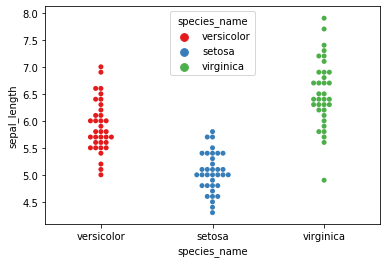

In [6]:
# Quick swarm plot to see data
sns.swarmplot(x="species_name", y="sepal_length", data=train, hue="species_name", palette="Set1")


In [7]:
# Dropping species_id and measuremnt_id
train.drop(columns = ['species_id', 'measurement_id'], inplace = True)
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,species_name,sepal_length,sepal_width,petal_length,petal_width
60,versicolor,5.0,2.0,3.5,1.0
16,setosa,5.4,3.9,1.3,0.4
88,versicolor,5.6,3.0,4.1,1.3
130,virginica,7.4,2.8,6.1,1.9
6,setosa,4.6,3.4,1.4,0.3


In [8]:
# Renaming species_name
train = train.rename({'species_name':'species'},axis=1)
train

,species,sepal_length,sepal_width,petal_length,petal_width
60,versicolor,5.0,2.0,3.5,1.0
16,setosa,5.4,3.9,1.3,0.4
88,versicolor,5.6,3.0,4.1,1.3
130,virginica,7.4,2.8,6.1,1.9
6,setosa,4.6,3.4,1.4,0.3
...,...,...,...,...,...
58,versicolor,6.6,2.9,4.6,1.3
41,setosa,4.5,2.3,1.3,0.3
12,setosa,4.8,3.0,1.4,0.1
20,setosa,5.4,3.4,1.7,0.2


In [9]:
# melting the data
train_melt = train.melt(id_vars="species", var_name = "measurement")
train_melt

,species,measurement,value
0,versicolor,sepal_length,5.0
1,setosa,sepal_length,5.4
2,versicolor,sepal_length,5.6
3,virginica,sepal_length,7.4
4,setosa,sepal_length,4.6
...,...,...,...
415,versicolor,petal_width,1.3
416,setosa,petal_width,0.3
417,setosa,petal_width,0.1
418,setosa,petal_width,0.2


In [10]:
train_melt = train_melt[((train_melt.measurement == 'sepal_length') | (train_melt.measurement == 'sepal_width') | (train_melt.measurement == 'petal_length') | (train_melt.measurement == 'petal_width'))]
train_melt

,species,measurement,value
0,versicolor,sepal_length,5.0
1,setosa,sepal_length,5.4
2,versicolor,sepal_length,5.6
3,virginica,sepal_length,7.4
4,setosa,sepal_length,4.6
...,...,...,...
415,versicolor,petal_width,1.3
416,setosa,petal_width,0.3
417,setosa,petal_width,0.1
418,setosa,petal_width,0.2


2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.
### It is a good visual of all the species with their corresponding measurements.

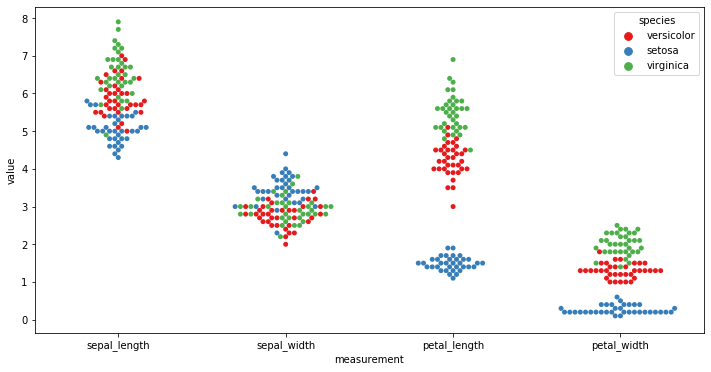

In [11]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=train_melt.measurement, y=train_melt.value, data=train_melt, hue="species", palette="Set1")

### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length
- What are your takeaways?

Text(0.5, 1.0, 'Sepal Length by Sepal Width')

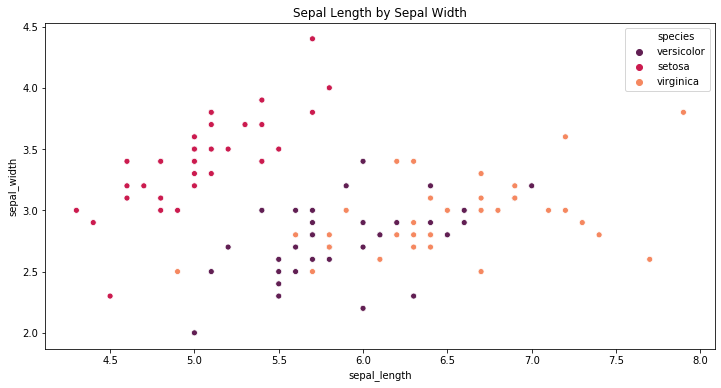

In [12]:
# Sepal length and sepal width
plt.figure(figsize=(12,6))
sns.scatterplot(x=train.sepal_length, y=train.sepal_width, hue=train.species, palette="rocket").set_title("Sepal Length by Sepal Width")

Text(0.5, 1.0, 'Sepal Length by Sepal Width')

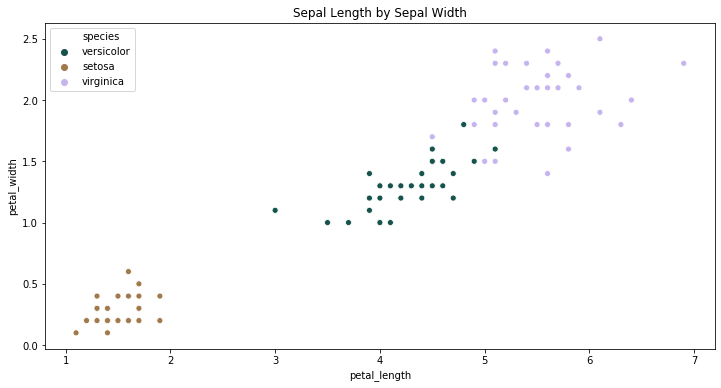

In [13]:
# petal_length x petal_width
plt.figure(figsize=(12,6))
sns.scatterplot(x=train.petal_length, y=train.petal_width, hue=train.species, 
                palette="cubehelix").set_title("Sepal Length by Sepal Width")

In [14]:
# sepal_area x petal_area. I need to make columns for sepal area and petal area
train['sepal_area'] = train.sepal_length * train.sepal_width
train["petal_area"] = train.petal_length * train.petal_width
train

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
60,versicolor,5.0,2.0,3.5,1.0,10.00,3.50
16,setosa,5.4,3.9,1.3,0.4,21.06,0.52
88,versicolor,5.6,3.0,4.1,1.3,16.80,5.33
130,virginica,7.4,2.8,6.1,1.9,20.72,11.59
6,setosa,4.6,3.4,1.4,0.3,15.64,0.42
...,...,...,...,...,...,...,...
58,versicolor,6.6,2.9,4.6,1.3,19.14,5.98
41,setosa,4.5,2.3,1.3,0.3,10.35,0.39
12,setosa,4.8,3.0,1.4,0.1,14.40,0.14
20,setosa,5.4,3.4,1.7,0.2,18.36,0.34


Text(0.5, 1.0, 'Sepal Area compared to Petal Area')

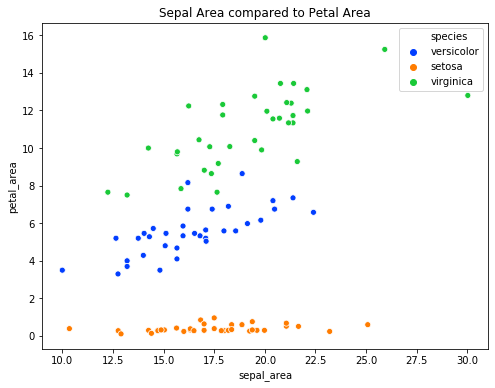

In [15]:
# sepal_area x petal_area
plt.figure(figsize=(8,6))
sns.scatterplot(x=train.sepal_area, y=train.petal_area, hue=train.species, 
                palette="bright").set_title("Sepal Area compared to Petal Area")

Text(0.5, 1.0, 'Sepal Length compared to Petal Length')

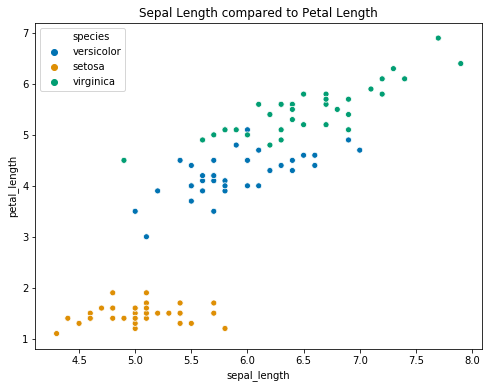

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train.sepal_length, y=train.petal_length, hue=train.species, 
                palette="colorblind").set_title("Sepal Length compared to Petal Length")

Text(0.5, 0.98, 'Comparision of Iris Measurements')

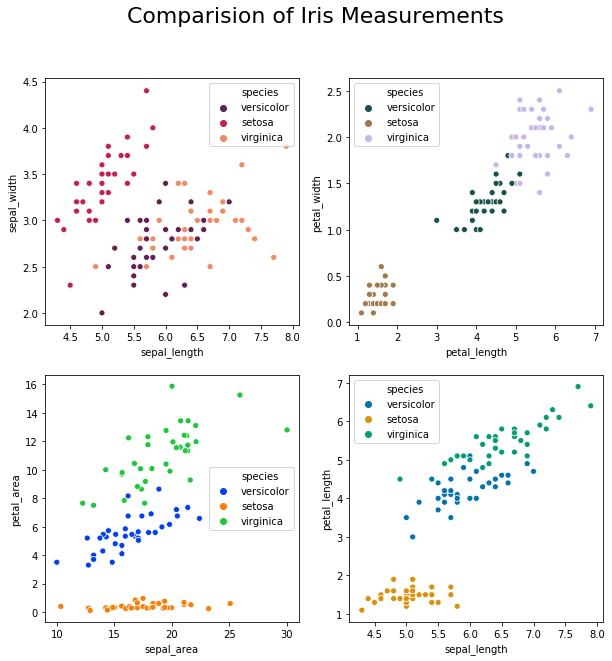

In [27]:
# Using sns to creat the subplots
fig, axes = plt.subplots(2,2, figsize=(10,10))

sns.scatterplot(ax = axes[0,0], x=train.sepal_length, y=train.sepal_width, hue=train.species, 
                palette="rocket")
sns.scatterplot(ax = axes[0,1], x=train.petal_length, y=train.petal_width, hue=train.species, 
                palette="cubehelix")
sns.scatterplot(ax = axes[1,0], x=train.sepal_area, y=train.petal_area, hue=train.species, 
                palette="bright")
sns.scatterplot(ax = axes[1,1], x=train.sepal_length, y=train.petal_length, hue=train.species, 
                palette="colorblind")

fig.suptitle("Comparision of Iris Measurements", fontsize= 22)


### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length
- What are your takeaways

Text(0.5, 0.98, 'Iris Dataset Measurement Comparison')

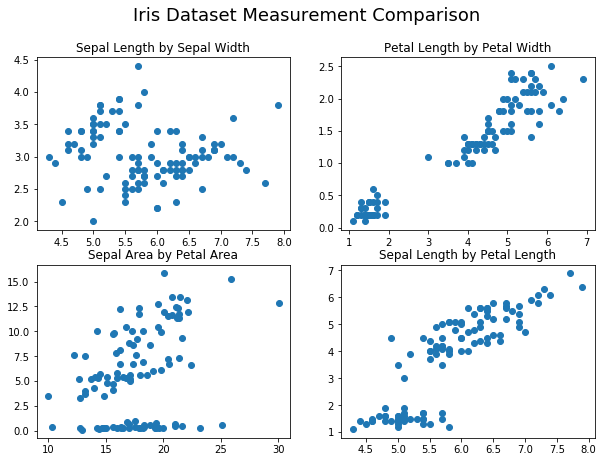

In [18]:
# Creating the subplots
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
x=train.sepal_length
y=train.sepal_width
plt.scatter(x,y)
plt.title("Sepal Length by Sepal Width")

plt.subplot(2,2,2)
x=train.petal_length
y=train.petal_width
plt.scatter(x,y)
plt.title("Petal Length by Petal Width")

plt.subplot(2,2,3)
x=train.sepal_area
y=train.petal_area
plt.scatter(x,y)
plt.title("Sepal Area by Petal Area")

plt.subplot(2,2,4)
x=train.sepal_length
y=train.petal_length
plt.scatter(x,y)
plt.title("Sepal Length by Petal Length")

plt.suptitle("Iris Dataset Measurement Comparison", fontsize = 18)

### 4. Create a heatmap of each variable layering correlation coefficient on top.

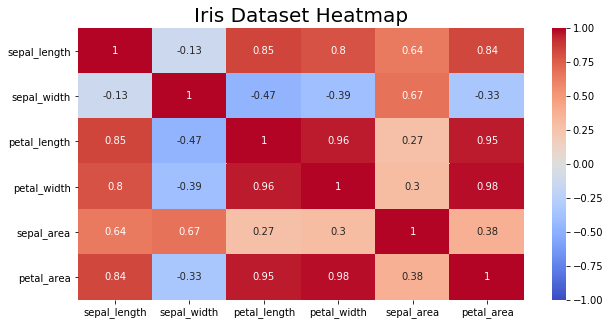

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),
            vmin=-1,
            cmap='coolwarm',
           annot=True).set_title("Iris Dataset Heatmap", fontsize=20);

In [69]:
sns.heatmap(uniform_data = train,vmin=-1,vmax=1)

TypeError: heatmap() missing 1 required positional argument: 'data'

## 5. Create a scatter matrix visualizing the interaction of each variable

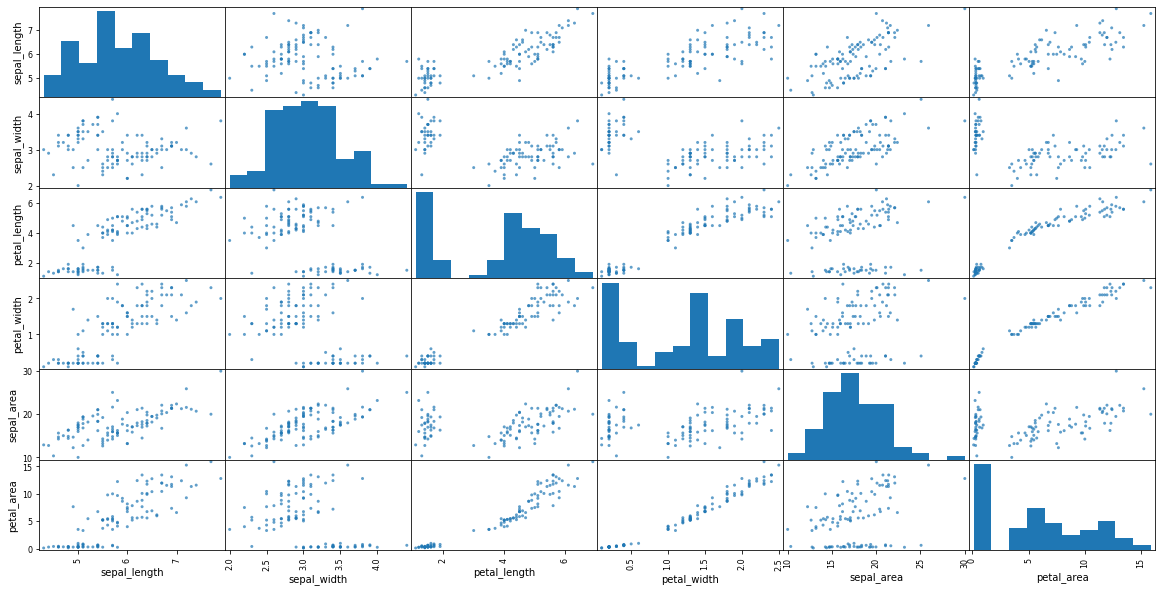

In [38]:
pd.plotting.scatter_matrix(train, alpha=0.7, figsize=(20, 10))
plt.show()

### 6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

What is your takeaway from this statistical testing?

### Going to use Pearsons Correlation Test
alpha = .05
- Ho = There is no linear relationship between sepal length in verginica and versicolor flowers
- Ha= There is a linear relationship between sepal length in verginica and versicolor flowers

In [42]:
x = verginica_sep_len = train[train.species == "virginica"].sepal_length
y = versicolor_sep_len = train[train.species == "versicolor"].sepal_length
r,p = stats.pearsonr(x,y)
r,p

(0.14137381577263997, 0.41789167454833964)

In [ ]:
#P- value is > alpha. We fail to reject the null hyp Ho that there is no linear
# relationship between sepal length of virginica and versicolor. 

### 7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [43]:
x = verginica_sep_len = train[train.species == "virginica"].sepal_length
y = versicolor_sep_width = train[train.species == "versicolor"].sepal_width
r,p = stats.pearsonr(x,y)
r,p

(0.026993687580792694, 0.8776689394598471)

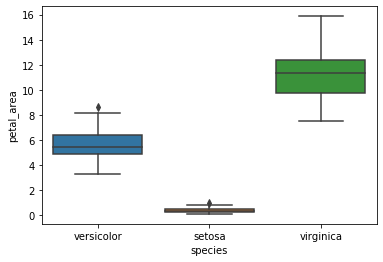

In [45]:
sns.boxplot(data = train, y='petal_area', x='species')

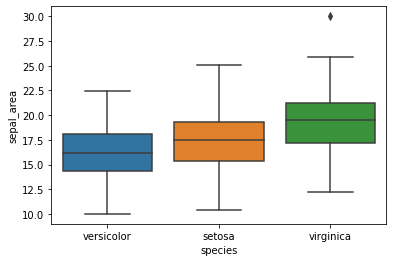

In [46]:
sns.boxplot(data = train, y='sepal_area', x='species')

In [55]:
sns.swarmplot(data=train, y='sepal_width', x='petal_length', hue='species')
set(xlim=(0,10),ylim(2,5))

SyntaxError: positional argument follows keyword argument (<ipython-input-55-00fec5941303>, line 2)

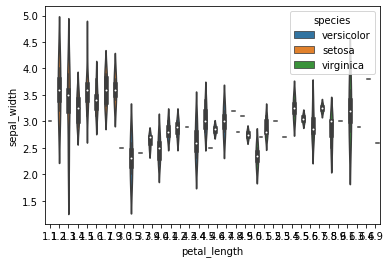

In [51]:
sns.violinplot(data=train, y='sepal_width', x='petal_length', hue='species')

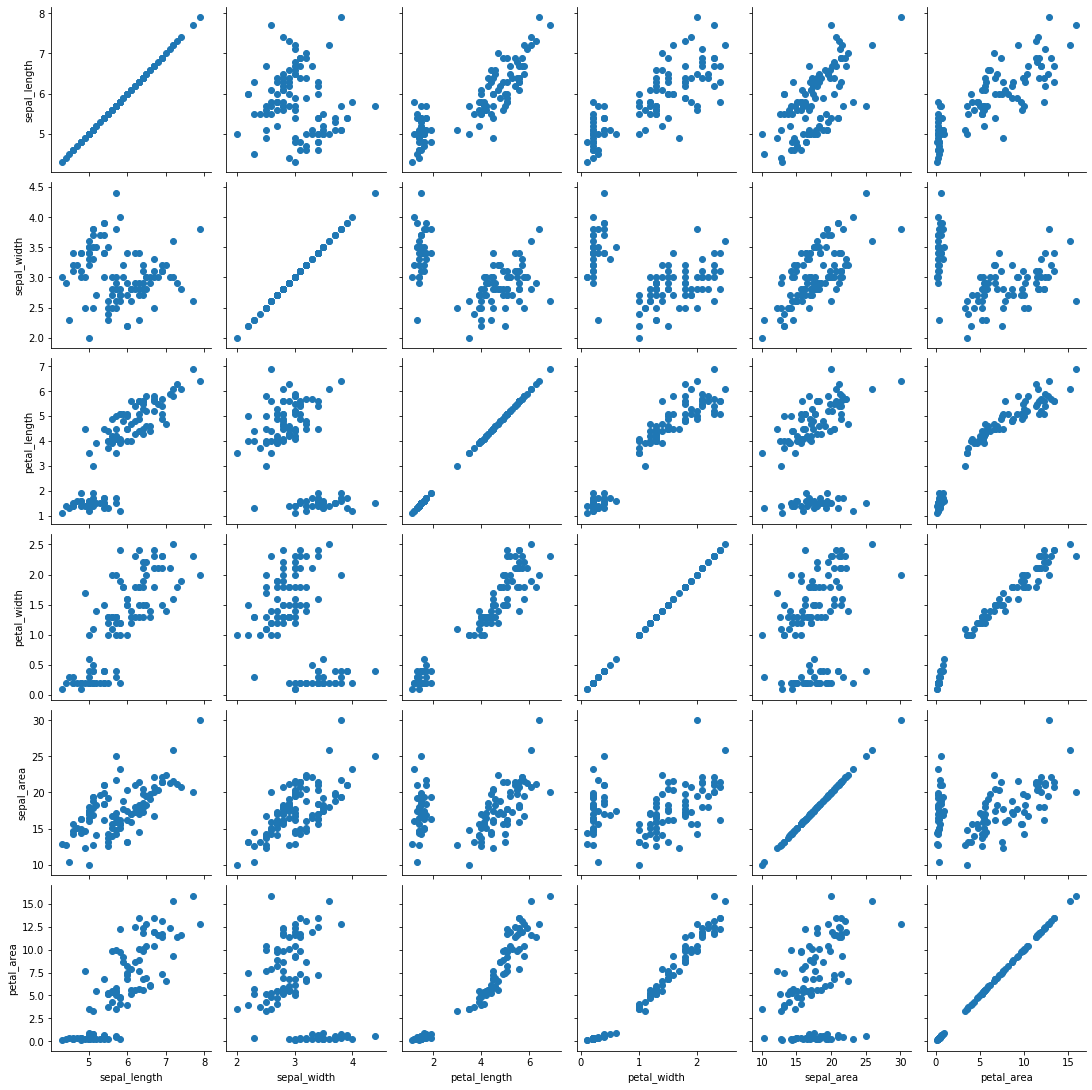

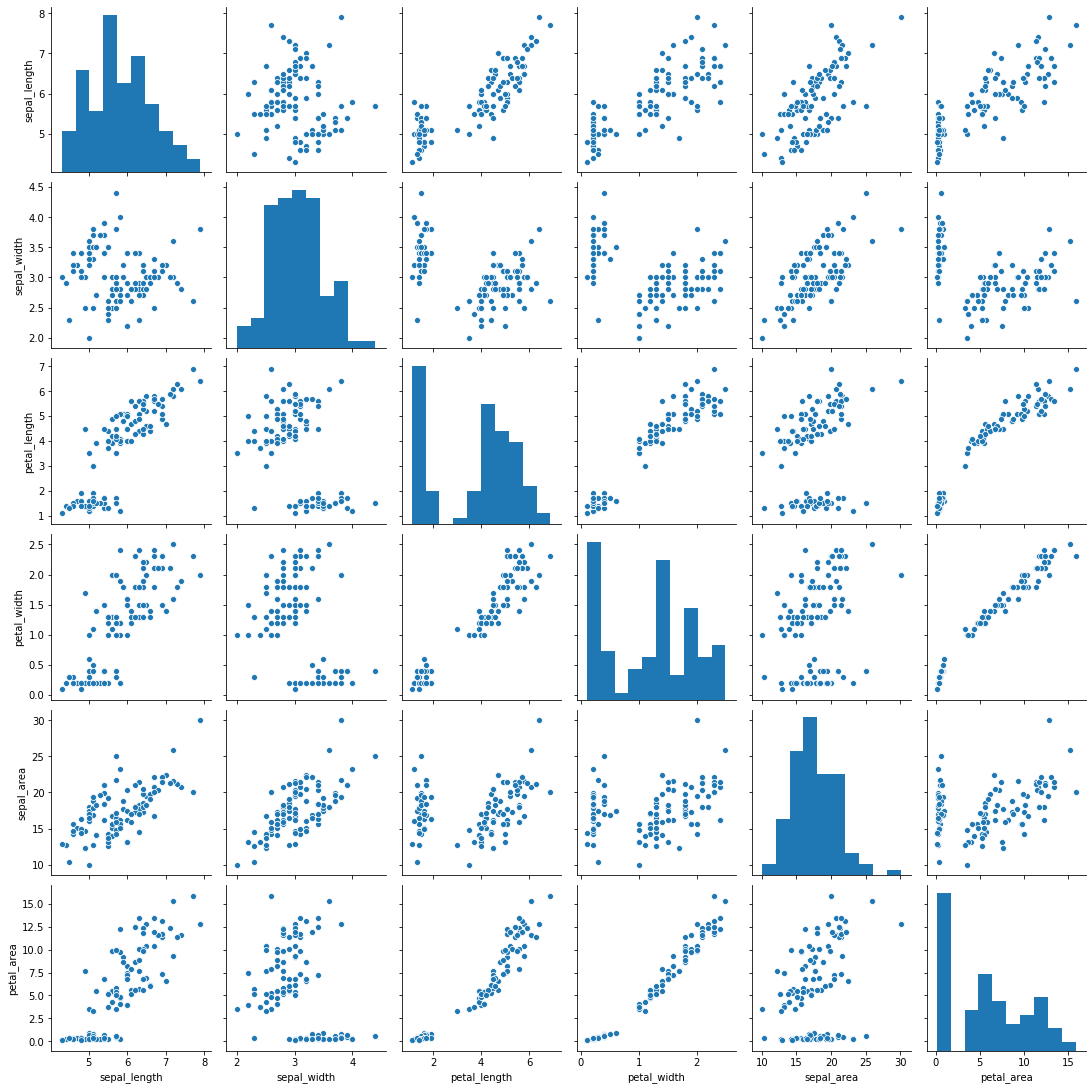

In [64]:
h = sns.PairGrid(train)
h = h.map(plt.scatter)
sns.pairplot(train) 


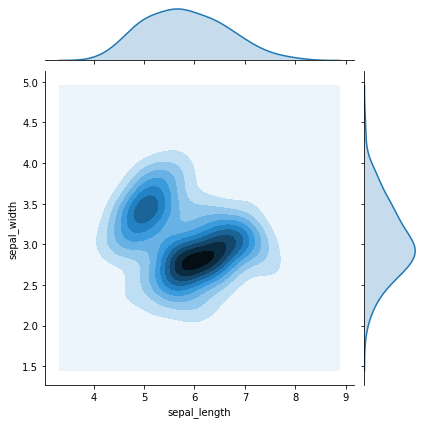

In [58]:
sns.jointplot("sepal_length",
 "sepal_width",
 data=train,
 kind='kde')

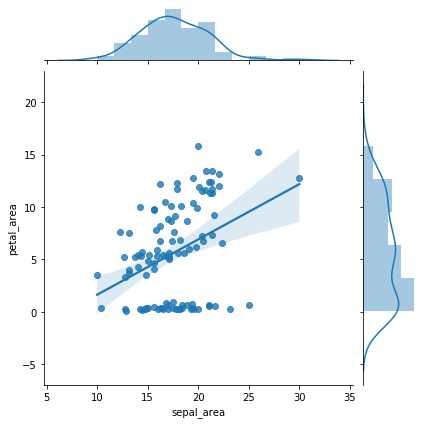

In [60]:
i = sns.JointGrid(x="sepal_area",
 y="petal_area",
 data=train)
i = i.plot(sns.regplot,
 sns.distplot)

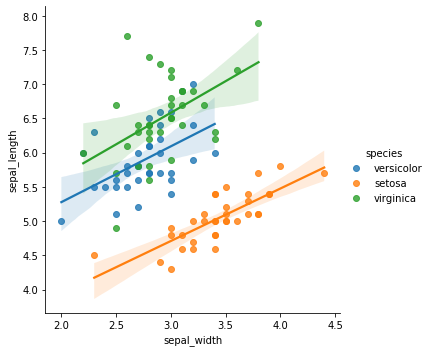

In [71]:
sns.lmplot(x="sepal_width",
 y="sepal_length",
 hue="species",
 data=train)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


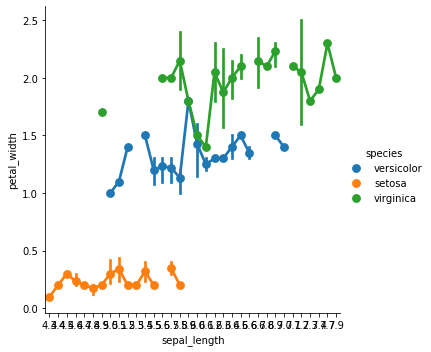

In [73]:
 sns.factorplot(x="sepal_length",
 y="petal_width", 
 hue="species",
 data=train) 